# Practica
* Problema:   Imagina que eres un investigador médico que recopila datos para un estudio. Has recopilado datos sobre un conjunto de pacientes, todos ellos con la misma enfermedad. Durante su tratamiento, cada paciente ha respondido a uno de los 5 medicamentos, el fármaco A, el fármaco B, el fármaco c, el fármaco X y el Y. 

* Parte de tu trabajo consiste en construir un modelo para averiguar qué medicamento podría ser apropiado para un futuro paciente con la misma enfermedad. Los conjuntos de características de este conjunto de datos son la edad, el sexo, la presión arterial y el colesterol de los pacientes, y el objetivo es estudiar el fármaco al que respondió cada paciente. 

* Se trata de un ejemplo de clasificador binario, y se puede utilizar la parte de entrenamiento del conjunto de datos para construir un árbol de decisión, y luego utilizarlo para predecir la clase de un paciente desconocido, o para prescribirlo a un nuevo paciente.

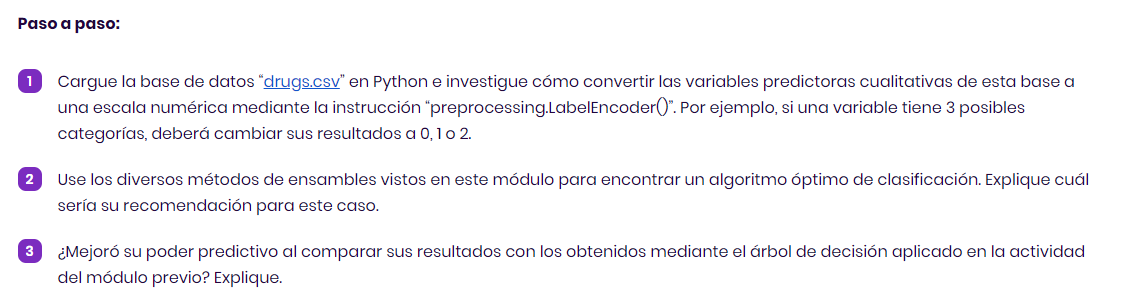

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_pill = pd.read_csv('C:/Users/Isaac/Desktop/IHD/EBAC DT/CIENCIA DE DATOS/M24 DS/drugs.csv')
df_pill.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [5]:
# definimos columnas para 'x' y 'y'

feature_cols = ['Age','Sex','BP','Cholesterol','Na_to_K']
X = df_pill[feature_cols].values
y = df_pill.Drug

In [7]:
# convertimos variables categoricas en cuantitativas con 'preprocessing'

from sklearn import preprocessing

cod_sex = preprocessing.LabelEncoder()
cod_sex.fit(['F','M'])
X[:,1] = cod_sex.transform(X[:,1])

cod_bp = preprocessing.LabelEncoder()
cod_bp.fit(['HIGH','LOW','NORMAL'])
X[:,2] = cod_bp.transform(X[:,2])

cod_cho = preprocessing.LabelEncoder()
cod_cho.fit(['HIGH','NORMAL'])
X[:,3] = cod_cho.transform(X[:,3])

USAMOS RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier

In [ ]:
# creamos grupos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [24]:
# inicializamos el metodo

rf = RandomForestClassifier(n_estimators = 100, random_state = 1)

In [25]:
# entrenamos el modelo

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [26]:
# realizamos predicciones

rf_pred = rf.predict(X_test)

In [27]:
# estadisticas de desempeño

from sklearn.metrics import classification_report
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         4
       drugB       1.00      1.00      1.00         2
       drugC       1.00      0.75      0.86         4
       drugX       0.93      1.00      0.96        13
       drugY       1.00      1.00      1.00        17

    accuracy                           0.97        40
   macro avg       0.99      0.95      0.96        40
weighted avg       0.98      0.97      0.97        40



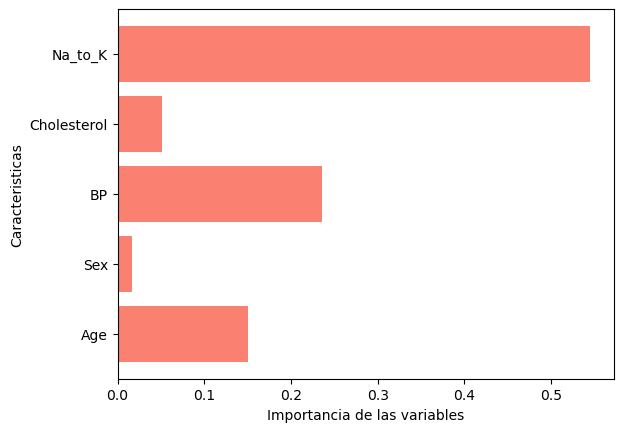

In [34]:
# creamos una funcion para imprimir las variables mas importantes

def plot_features_imp(df_pill, model):
    n_features = feature_cols
    plt.barh(n_features, model.feature_importances_, align = 'center', color = 'salmon')
    plt.xlabel('Importancia de las variables')
    plt.ylabel('Caracteristicas')
    plt.show()

plot_features_imp(df_pill, rf)

USAMOS GRADIENT BOOSTED TREE

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

In [19]:
# creamos grupos de entrenamiento y pruebas

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [28]:
# inicalizamos el modelo

gbt = GradientBoostingClassifier(n_estimators = 100, random_state = 1)

In [29]:
# entrenamos el modelo

gbt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [30]:
# realizamos predicciones

gbt_pred = gbt.predict(X_test)

In [33]:
# estadisticas de desempeño

print(classification_report(y_test, gbt_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         4
       drugB       1.00      1.00      1.00         2
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        13
       drugY       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



Con el Modelo GBT obtuvimos resultados excelentes, la Precision Global es de 1.0 y para los Score F1 en todos los medicamentos dio un valor de 1.0.
Con estos resultados podemos recomedar cualquiera de los 5 medicamentos.

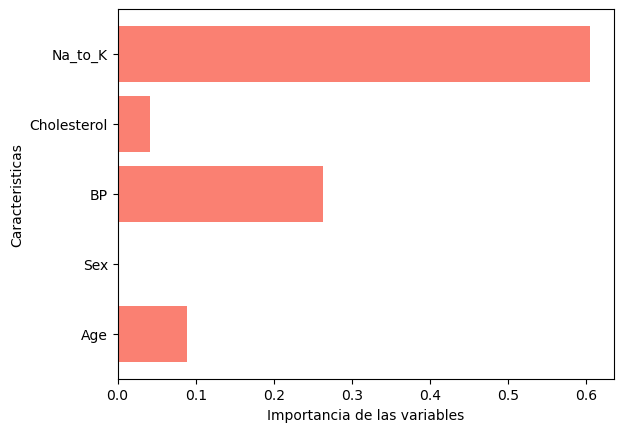

In [35]:
# graficamos

plot_features_imp(df_pill, gbt)

# Probamos el modelo que mejor dio resultados con los valores indicados en la practica.
* En este caso es el modelo GBT

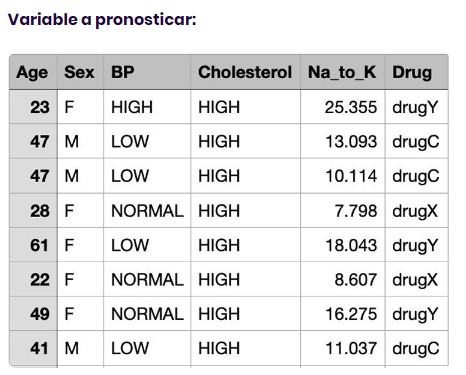

In [36]:
df_pronosticar = {'Age': 23,'Sex': 'F','BP': 'HIGH','Cholesterol': 'HIGH','Na_to_K': 25.355,
                  'Age': 47,'Sex': 'M','BP': 'LOW','Cholesterol': 'HIGH','Na_to_K': 13.093,
                  'Age': 47,'Sex': 'M','BP': 'LOW','Cholesterol': 'HIGH','Na_to_K': 10.114,
                  'Age': 28,'Sex': 'F','BP': 'NORMAL','Cholesterol': 'HIGH','Na_to_K': 7.798,
                  'Age': 61,'Sex': 'F','BP': 'LOW','Cholesterol': 'HIGH','Na_to_K': 18.043,
                  'Age': 22,'Sex': 'F','BP': 'NORMAL','Cholesterol': 'HIGH','Na_to_K': 8.607,
                  'Age': 49,'Sex': 'F','BP': 'NORMAL','Cholesterol': 'HIGH','Na_to_K': 16.275,
                  'Age': 41,'Sex': 'M','BP': 'LOW','Cholesterol': 'HIGH','Na_to_K': 11.037}

df_pronosticar['Sex'] = cod_sex.transform([df_pronosticar['Sex']])[0]
df_pronosticar['BP'] = cod_bp.transform([df_pronosticar['BP']])[0]
df_pronosticar['Cholesterol'] = cod_cho.transform([df_pronosticar['Cholesterol']])[0]

In [39]:
df_array = np.array([[df_pronosticar['Age'], df_pronosticar['Sex'],
                    df_pronosticar['BP'], df_pronosticar['Cholesterol'], df_pronosticar['Na_to_K']]])

df_array

array([[41.   ,  1.   ,  1.   ,  0.   , 11.037]])

In [42]:
# realizamos las predicciones usando GBT

pred_drug = gbt.predict(df_array)
print('La recomendación para este grupo de personas es el Medicamento:' , pred_drug[0])

La recomendación para este grupo de personas es el Medicamento: drugC
